report structure:
1. describe the dataset: the title, the columns, the content of each columns.
2. pre-processing the data: deal with the missing data, the numerical and catagorical data.
3. give the analysis and output one by one.

data Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, and the third in 2015. The World Happiness Report 2016 Update, which ranks 156 countries by their happiness levels, was released today in Rome in advance of UN World Happiness Day, March 20th. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness. They reflect a new worldwide demand for more attention to happiness as a criteria for government policy.


content:

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2015 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.


Inspiration:

What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness? 

How did country ranks or scores change between the 2015 and 2016 reports? 

Did any country experience a significant increase or decrease in happiness?

analysis:
1. for each year, explore the data.
2. for 2015 & 2016 years, explore the 
3. find the most factor and connect with the twiter data.

In [36]:
import pandas as pd
# from pythainlp.segment import segment
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [27]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# 1. find out the distribution of the different Iris flower features

In [67]:
data2015 = pd.read_csv("data/2015.csv")

In [22]:
data2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [66]:
data2016 = pd.read_csv("data/2016.csv")

In [68]:
data2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [9]:
#Let's rename Economy (blabla) to Economy
dataset = data2015.rename(columns={'Economy (GDP per Capita)': 'Economy'})

In [28]:
from sklearn.preprocessing import StandardScaler

In [24]:
df = dataset.ix[:,4:]

In [29]:
X_std = StandardScaler().fit_transform(df)

In [42]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00636943 -0.21903713 -0.12149686 -0.31226321 -0.13059982 -0.17946047
  -0.08900205  0.08451585]
 [-0.21903713  1.00636943  0.64940958  0.8216785   0.3726583   0.30984625
  -0.0105321   0.04031391]
 [-0.12149686  0.64940958  1.00636943  0.53448682  0.44433043  0.2069147
   0.08807065  0.14906046]
 [-0.31226321  0.8216785   0.53448682  1.00636943  0.36277256  0.24991643
   0.10902525  0.01910021]
 [-0.13059982  0.3726583   0.44433043  0.36277256  1.00636943  0.49666698
   0.37629776  0.06318334]
 [-0.17946047  0.30984625  0.2069147   0.24991643  0.49666698  1.00636943
   0.27788145 -0.03331543]
 [-0.08900205 -0.0105321   0.08807065  0.10902525  0.37629776  0.27788145
   1.00636943 -0.10194634]
 [ 0.08451585  0.04031391  0.14906046  0.01910021  0.06318334 -0.03331543
  -0.10194634  1.00636943]]


In [43]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [44]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(reverse=True)

In [45]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

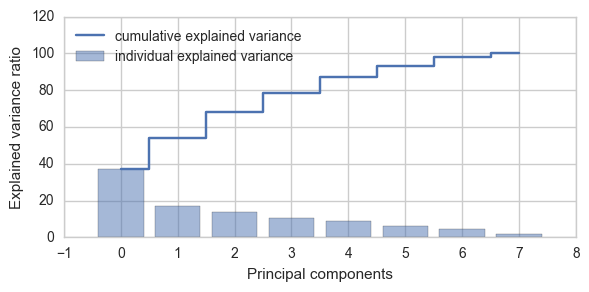

In [48]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 3))

    plt.bar(range(8), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(8), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [50]:
from sklearn.decomposition import PCA

In [57]:
X = np.array(X_std)

In [58]:
pca=PCA(n_components=6)

In [59]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [64]:
pd.DataFrame(pca.transform(X)).head()

,0,1,2,3,4,5
0,-3.513627,0.503948,0.639556,-0.675167,0.954622,0.139030
1,-2.657599,0.017667,1.261652,0.028601,-1.419157,0.152311
2,-3.515154,1.041182,0.729668,-0.782308,1.122230,0.231405
3,-3.319349,0.609895,0.764409,-0.357126,0.469029,0.153211
4,-3.181371,1.078879,0.668736,-0.495697,-0.363286,0.393299


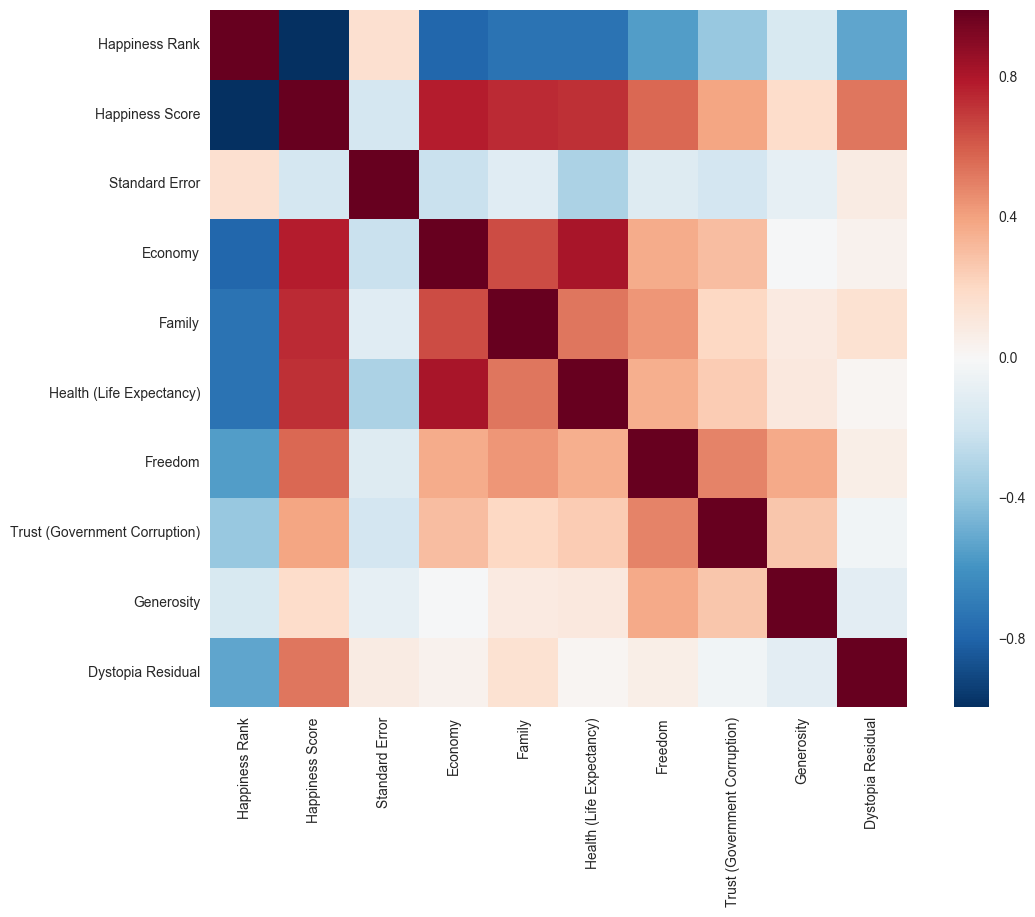

In [10]:
#correlation matrix
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

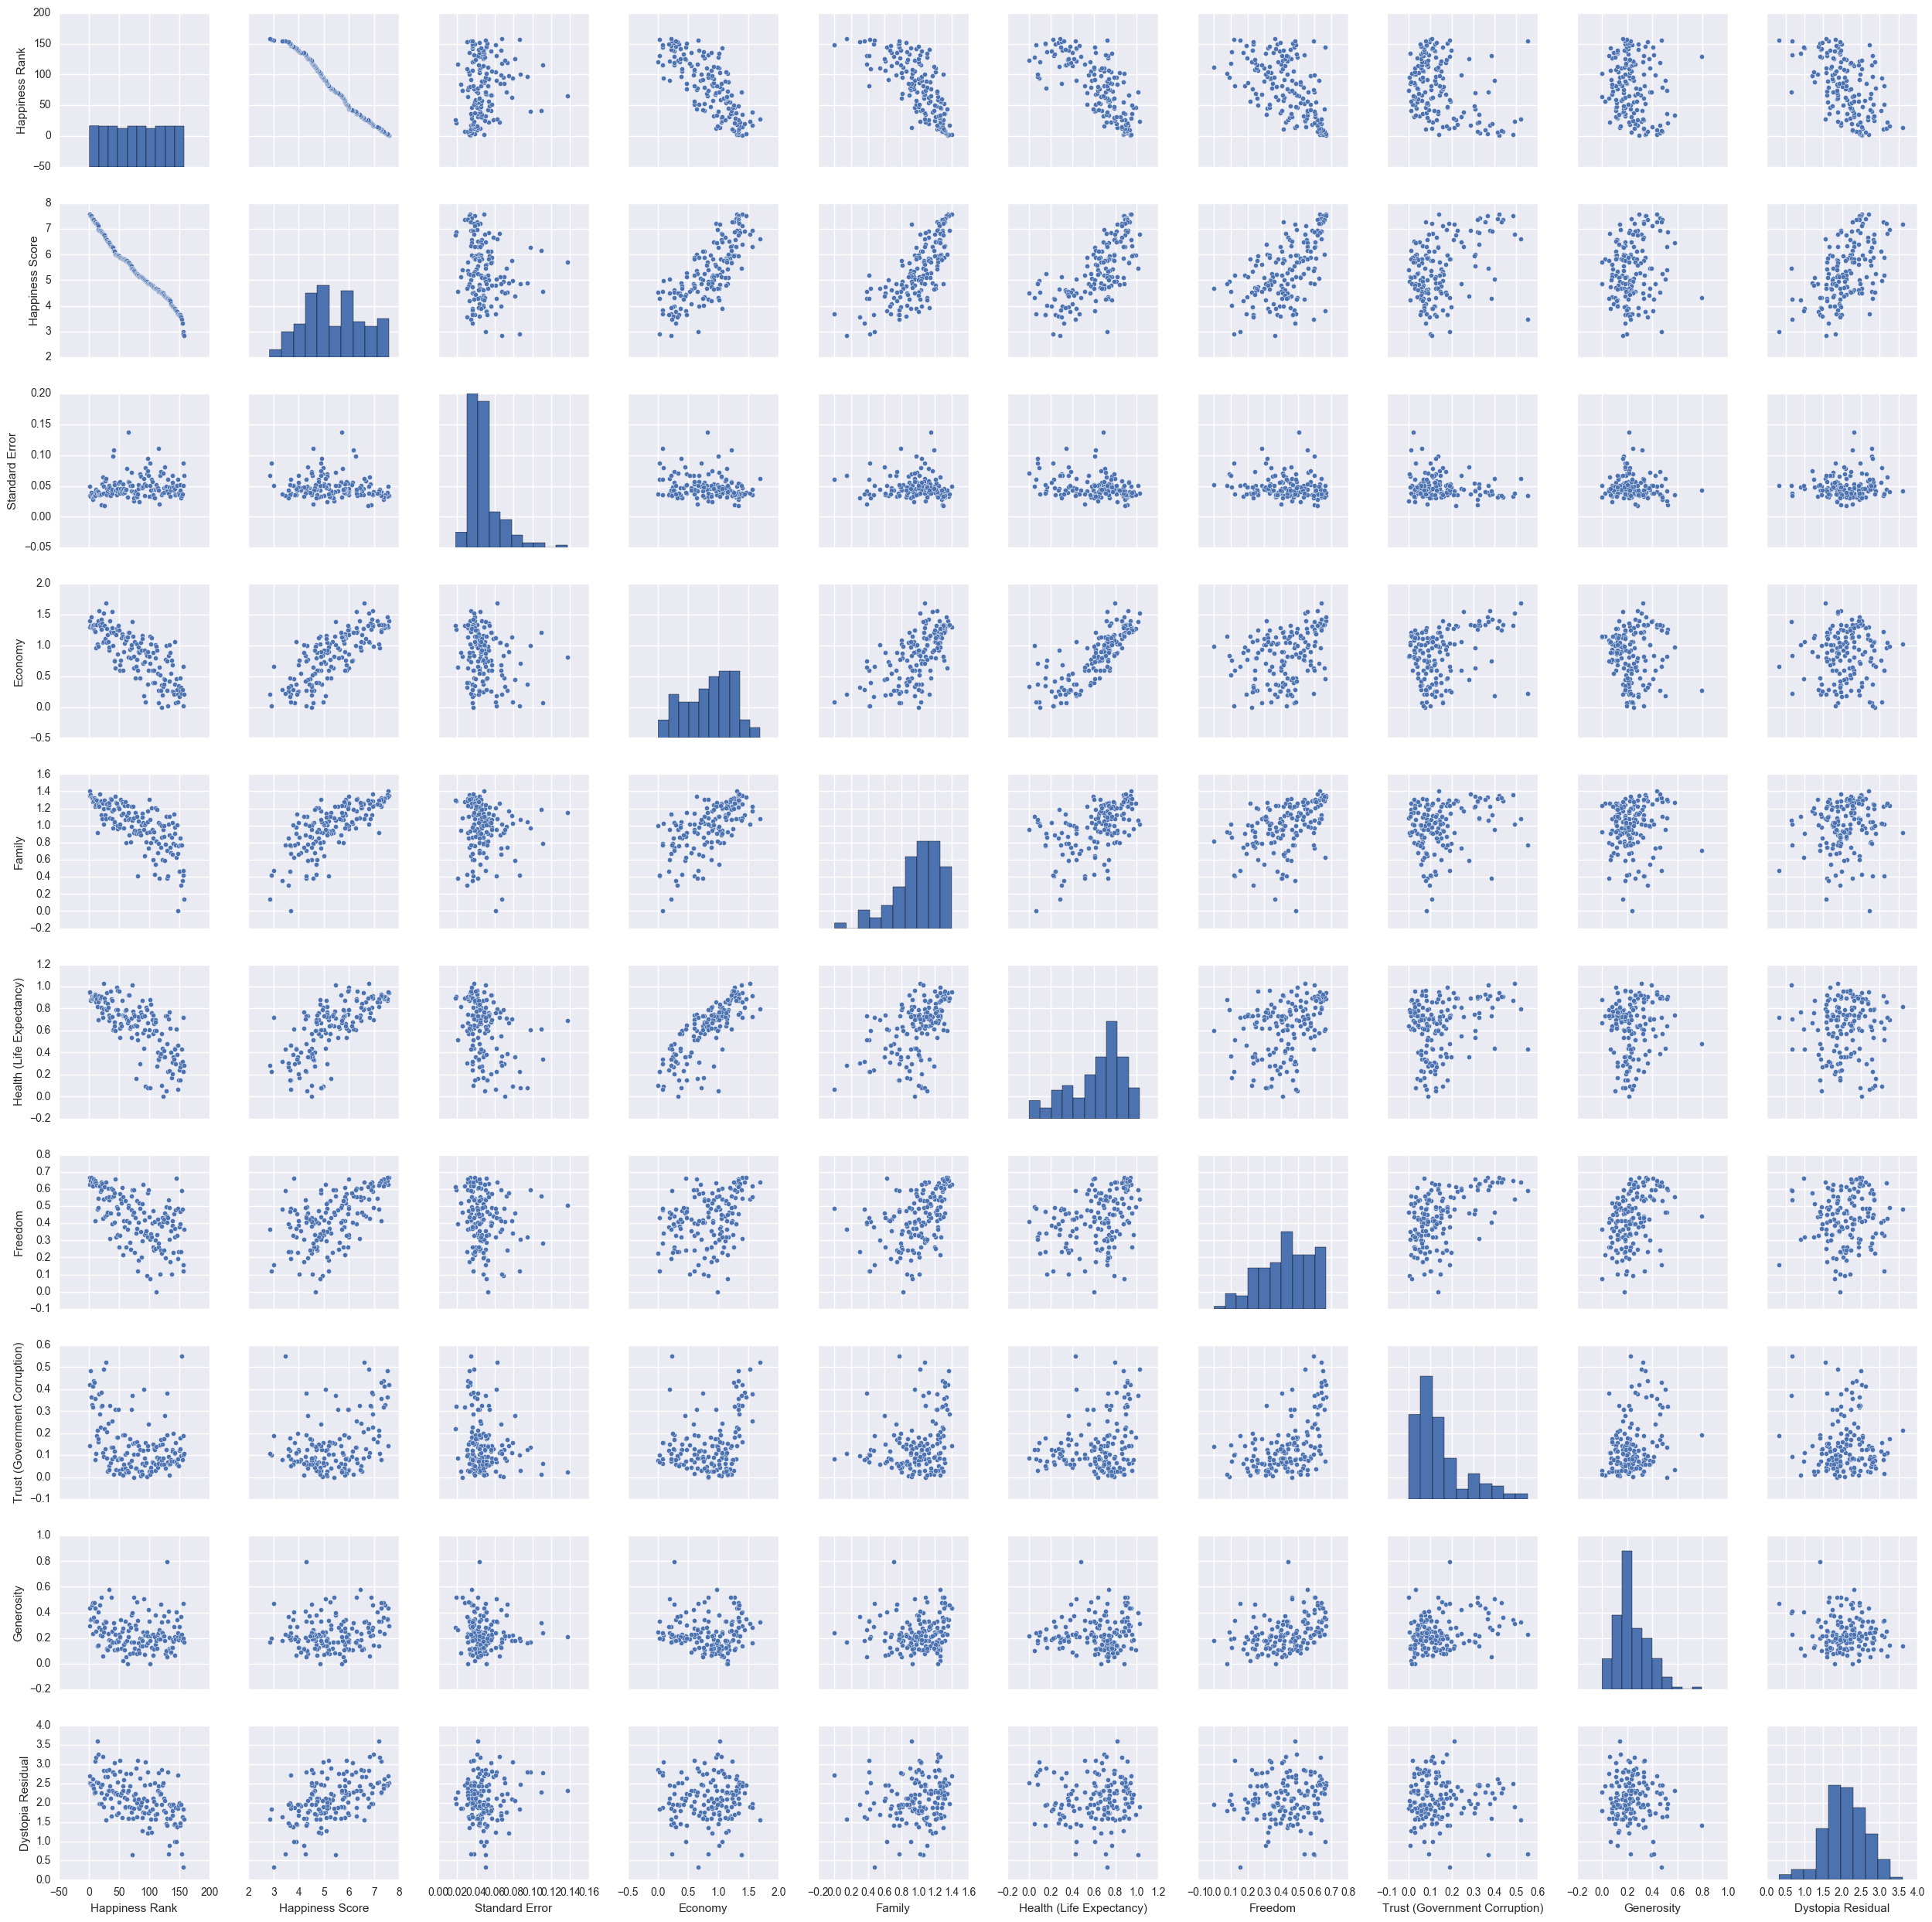

In [11]:
#scatterplot
sns.set()
sns.pairplot(dataset, size = 2.5)
plt.show();

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

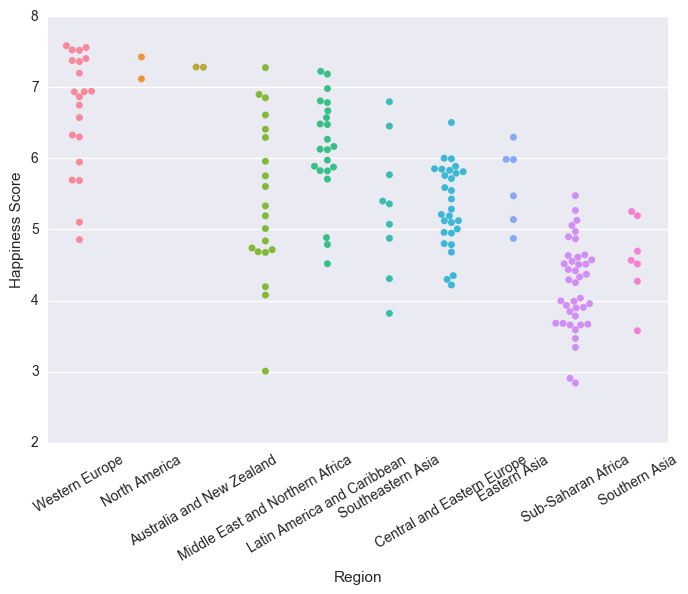

In [12]:
sns.swarmplot(x="Region", y="Happiness Score",  data=dataset)
plt.xticks(rotation=30)

In [13]:
w_europe = dataset[dataset.Region=='Western Europe']
ec_europe = dataset[dataset.Region=='Central and Eastern Europe']
europe = pd.concat([w_europe,ec_europe],axis=0)
europe.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


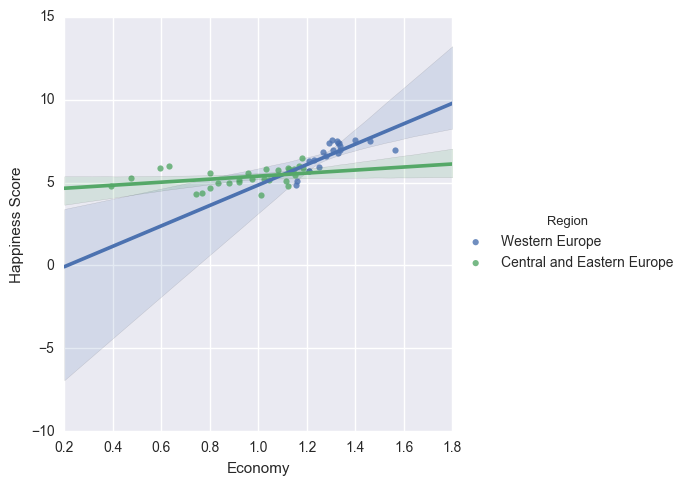

In [14]:
sns.lmplot(data=europe,x='Economy',y='Happiness Score',hue="Region")

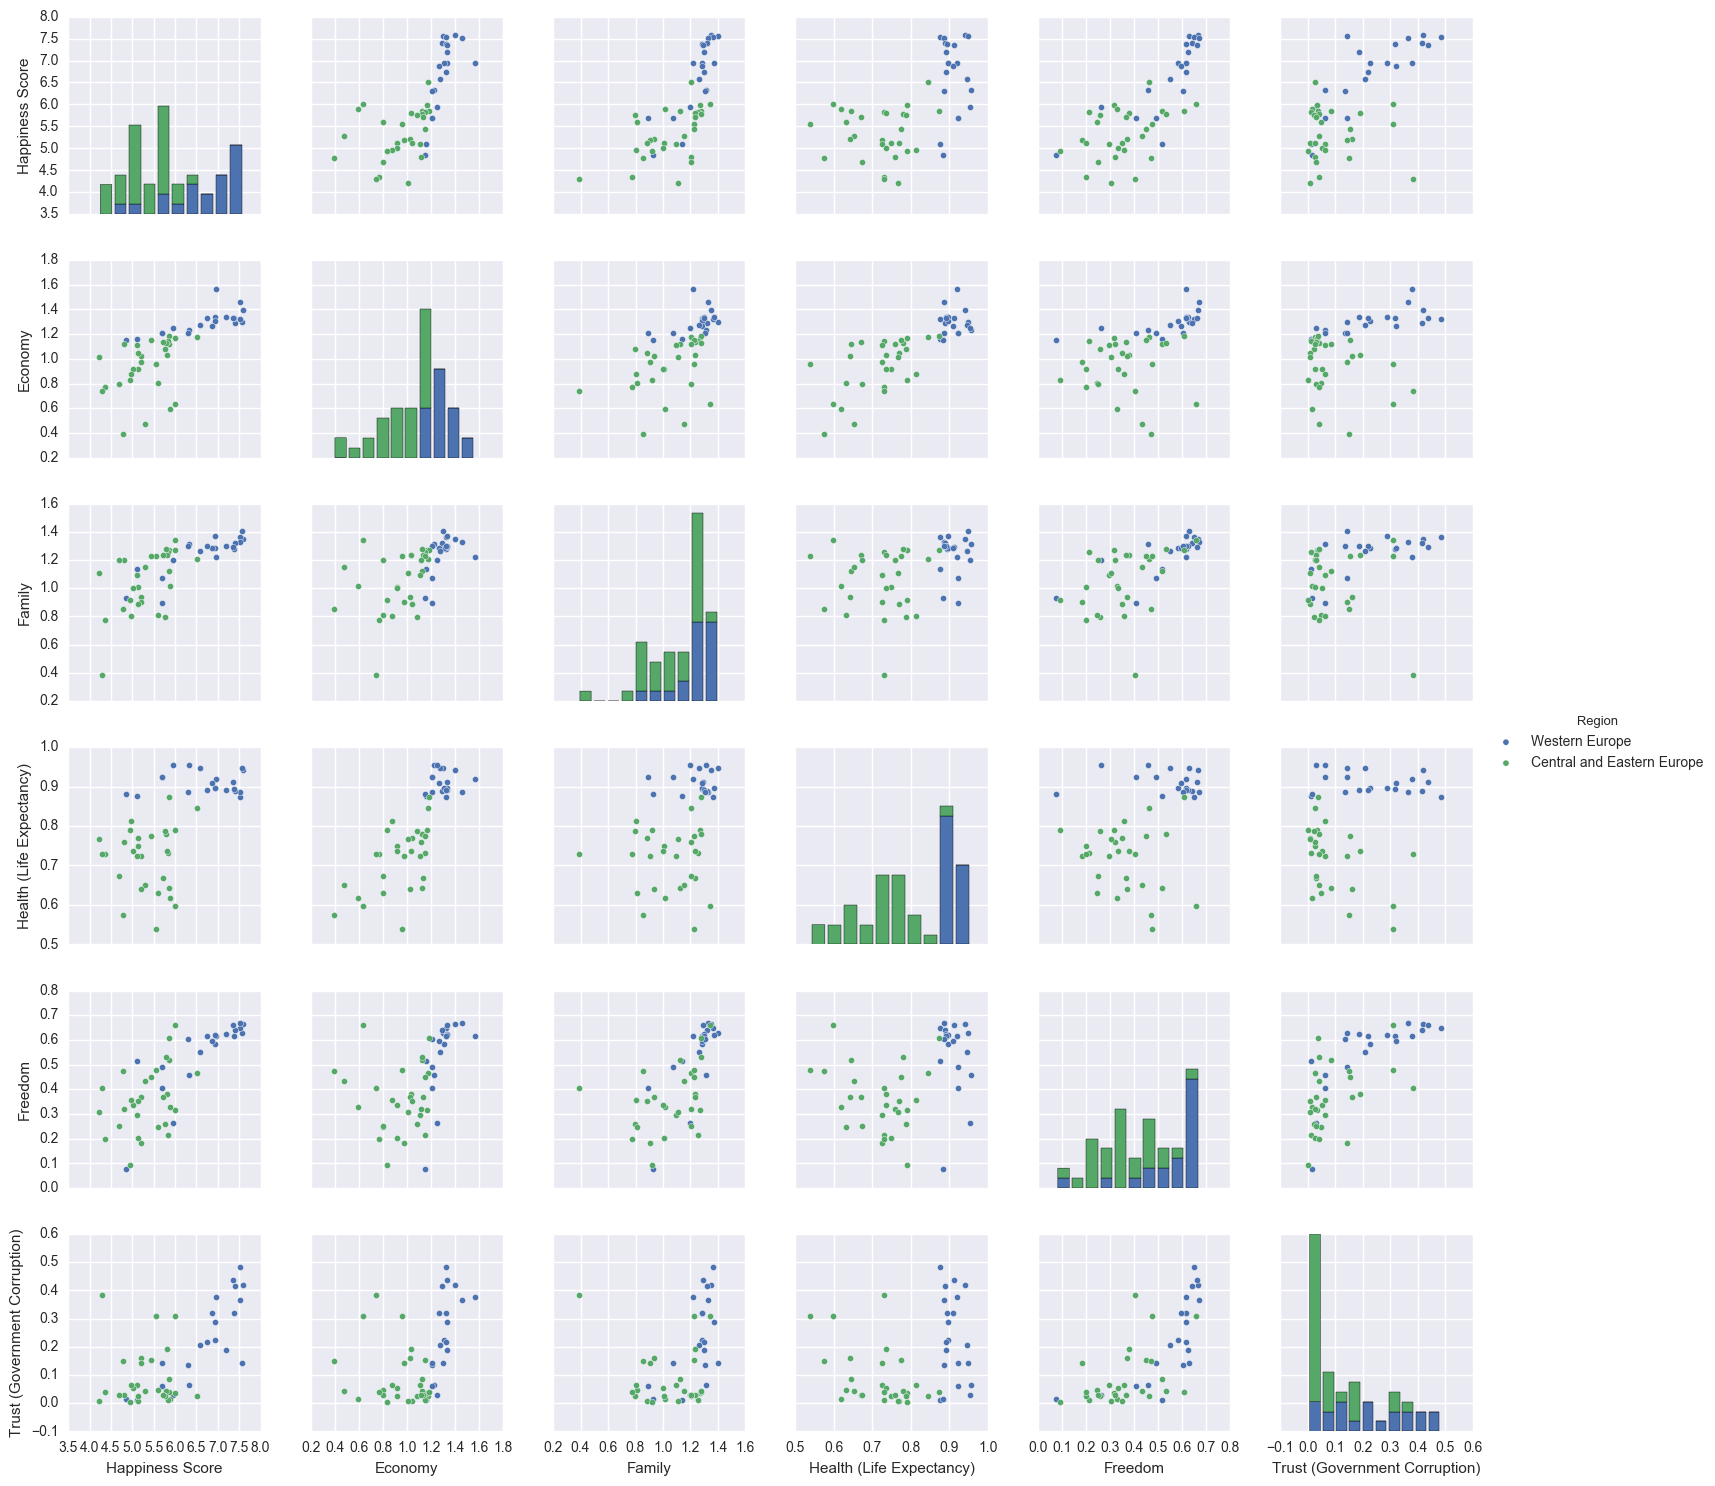

In [15]:
selectCols=  ['Happiness Score','Economy','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Region']
sns.pairplot(europe[selectCols], hue='Region',size=2.5)

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


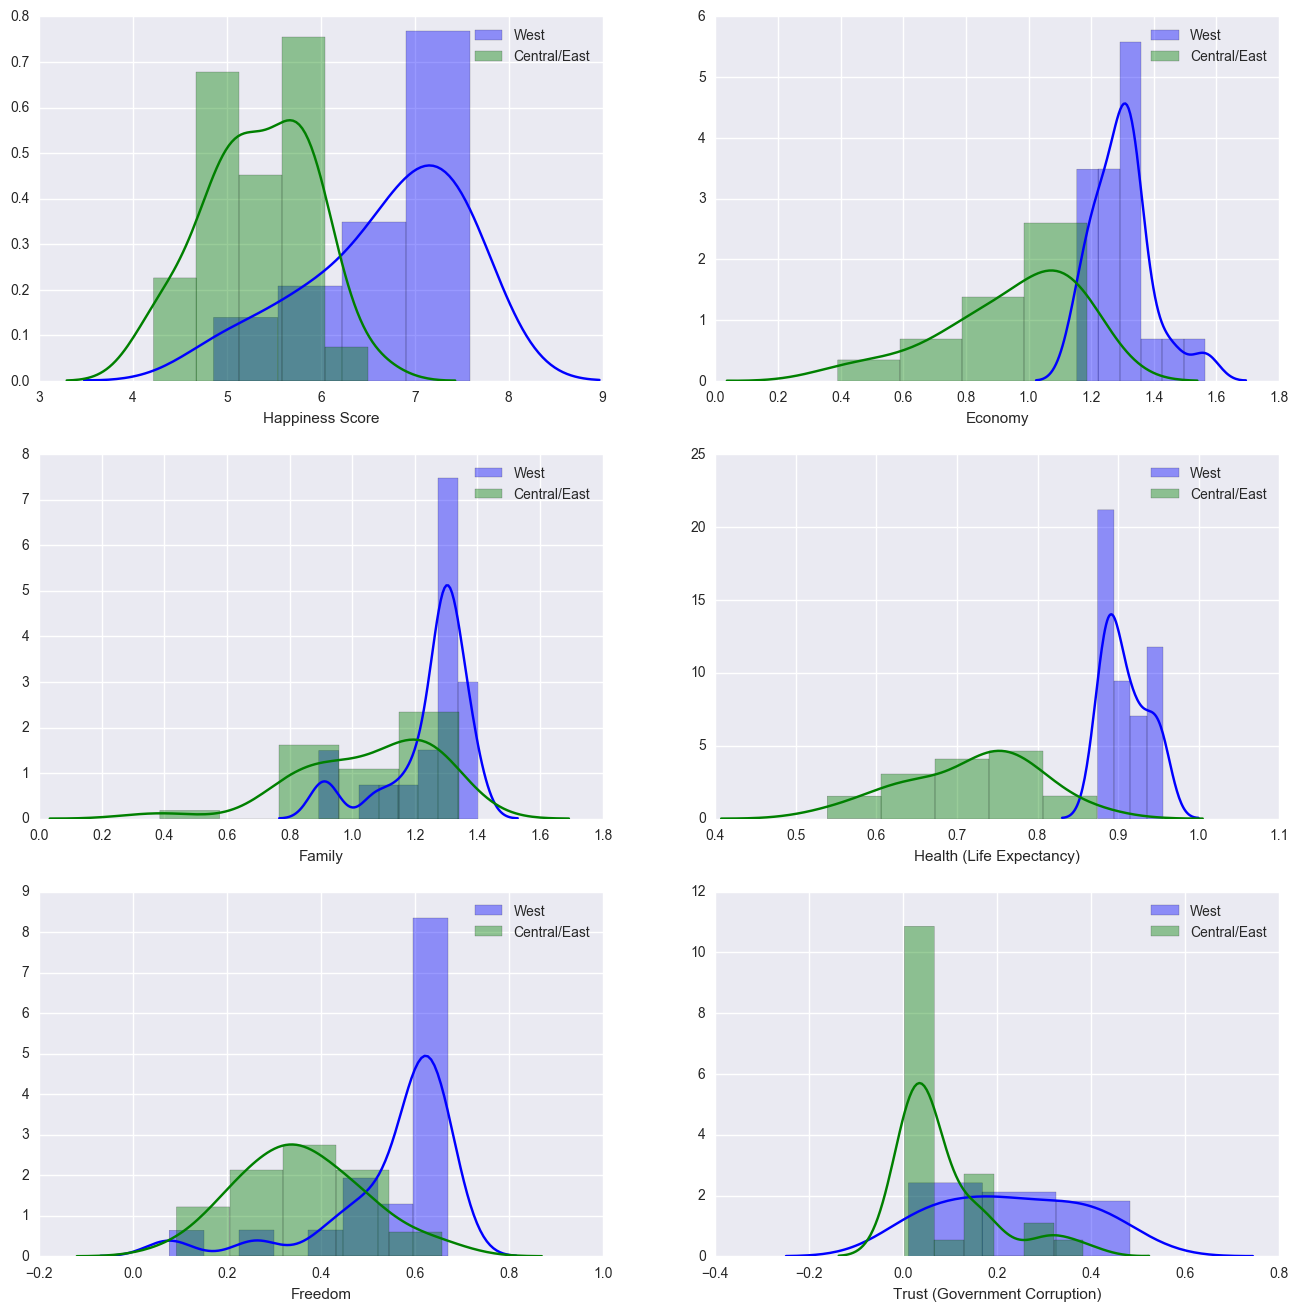

In [69]:
f, axes = plt.subplots(3, 2, figsize=(16, 16))
axes = axes.flatten()
compareCols = ['Happiness Score','Economy','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
for i in range(len(compareCols)):
    col = compareCols[i]
    axi = axes[i]
    sns.distplot(w_europe[col],color='blue' , label='West', ax=axi)
    sns.distplot(ec_europe[col],color='green', label='Central/East',ax=axi)
    axi.legend()

In [17]:
def plot_compare(dataset,regions,compareCols):
    n = len(compareCols)
    f, axes = plt.subplots(math.ceil(n/2), 2, figsize=(16, 6*math.ceil(n/2)))
    axes = axes.flatten()
    #compareCols = ['Happiness Score','Economy','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
    for i in range(len(compareCols)):
        col = compareCols[i]
        axi = axes[i]
        for region in regions:
            this_region = dataset[dataset['Region']==region]
            sns.distplot(this_region[col], label=region, ax=axi)
        axi.legend()

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


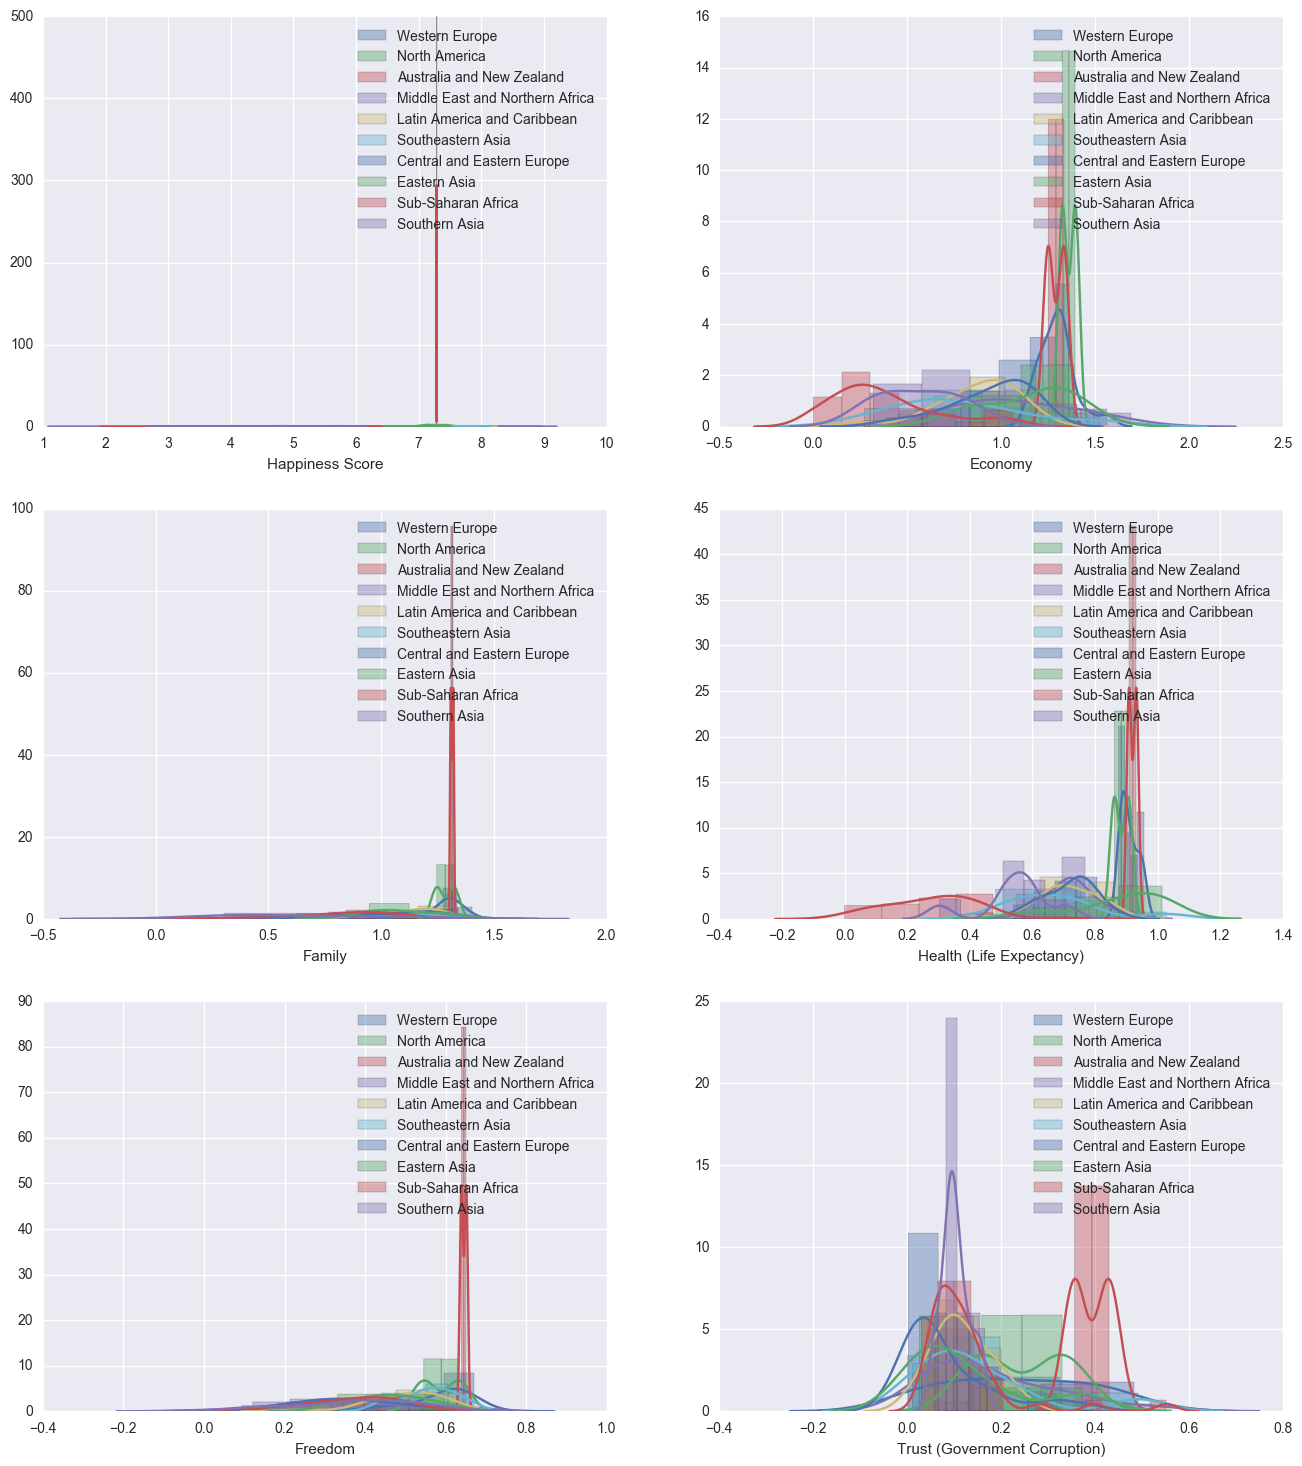

In [18]:
plot_compare(dataset,['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'],['Happiness Score','Economy','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)'])

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


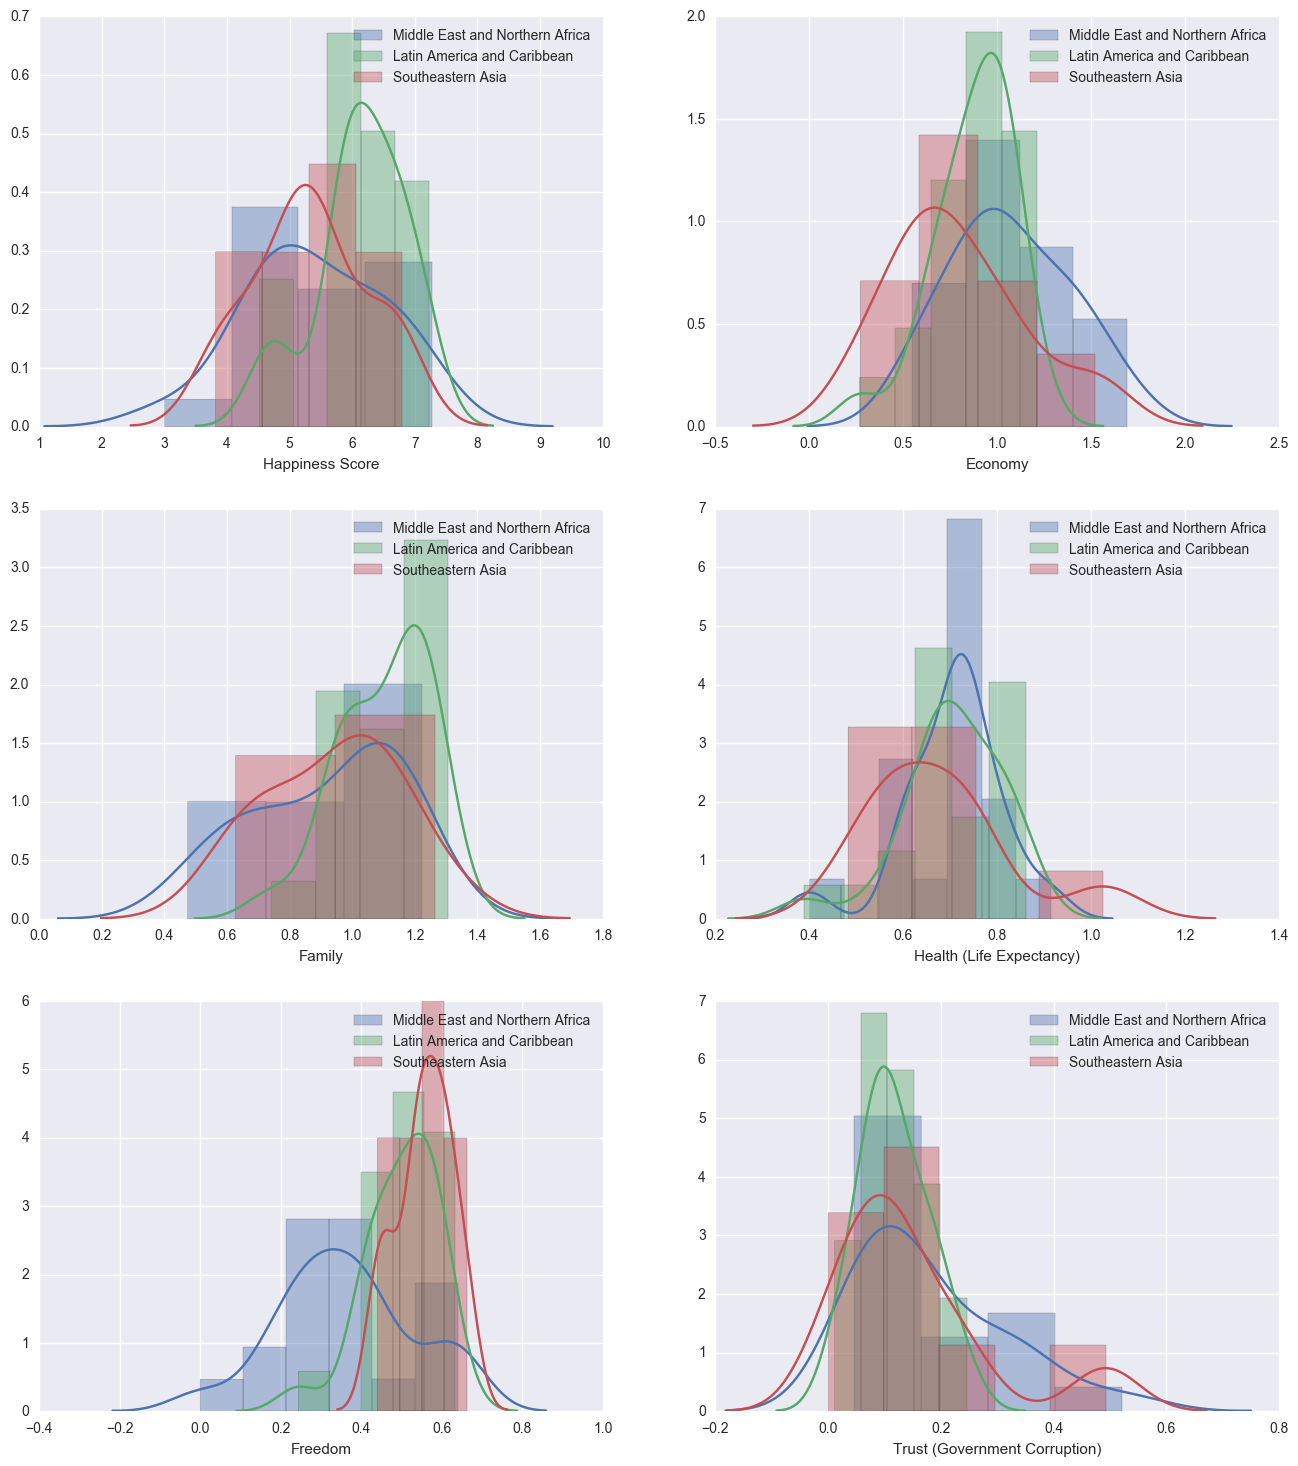

In [19]:
regions = [
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia']
selectCol = ['Happiness Score','Economy','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
plot_compare(dataset,regions,selectCol)

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


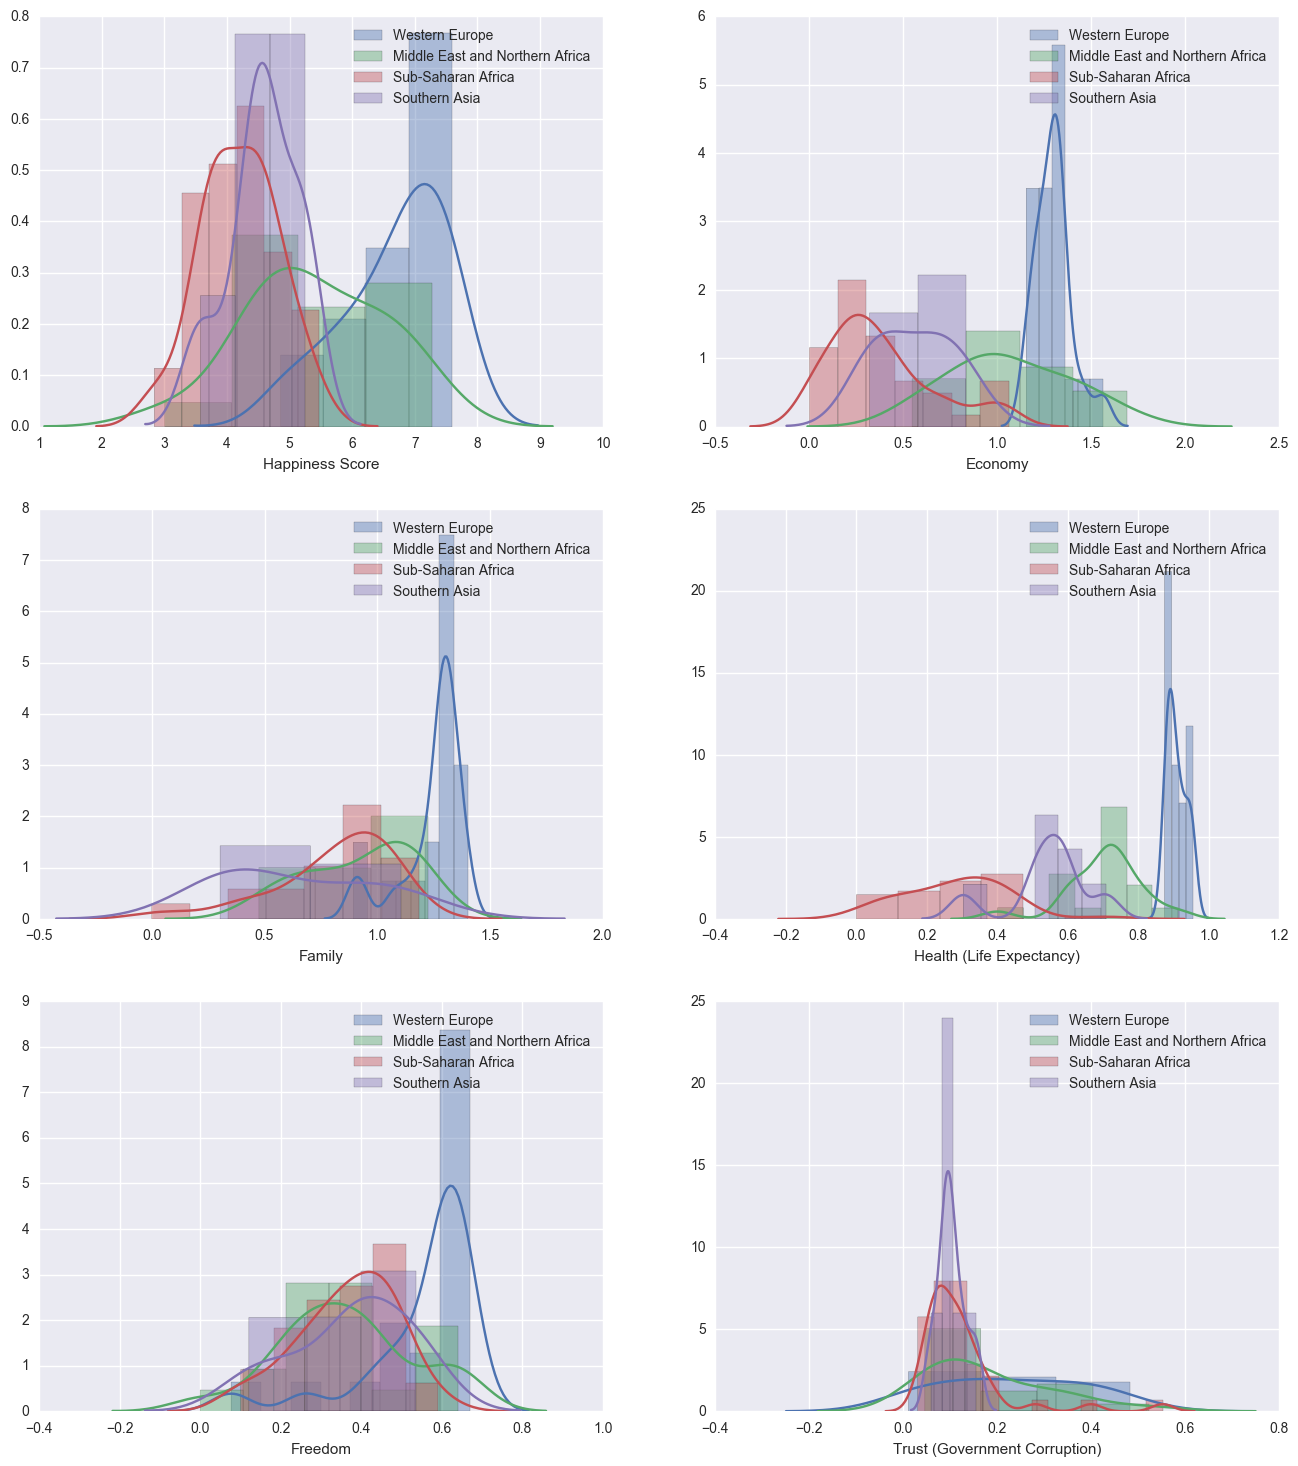

In [20]:
regions = ['Western Europe', 'Middle East and Northern Africa',
       'Sub-Saharan Africa', 'Southern Asia']
selectCol = ['Happiness Score','Economy','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
plot_compare(dataset,regions,selectCol)